## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("train_data.csv")
valid_data = pd.read_csv("valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(534, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(229, 2)


,Date,count
0,2014-02-09,196
1,2014-02-10,299
2,2014-02-11,224
3,2014-02-12,216
4,2014-02-13,212


# Required Preprocessing 

In [5]:
train_data["Date"] = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')


In [6]:
valid_data["Date"] = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')


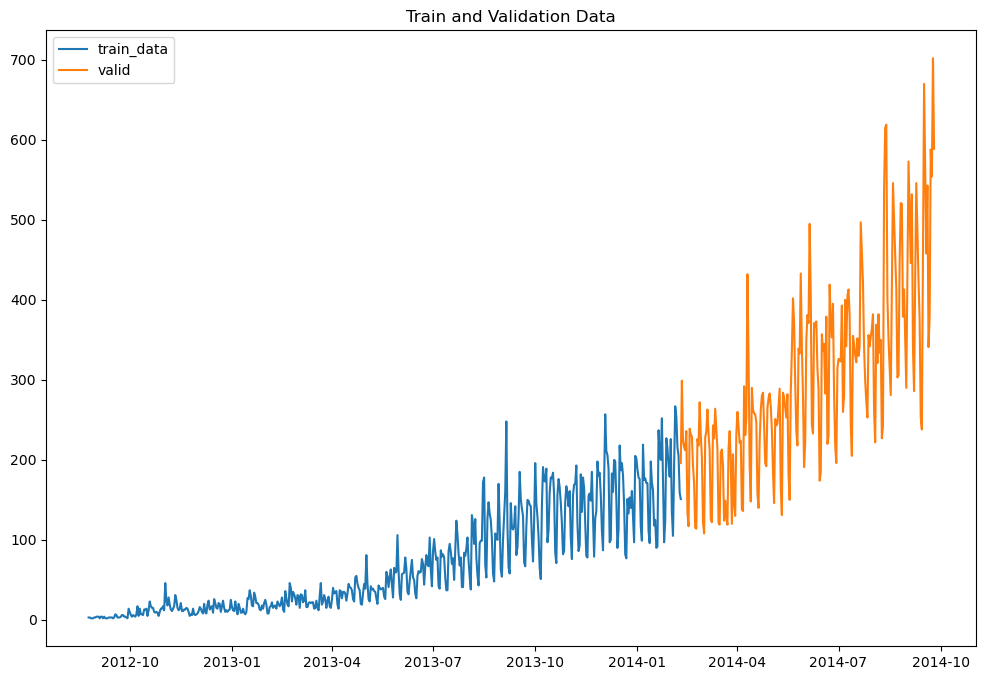

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Moving Average

We have a straight line here because same average value is predicted for all future points. We can change the 'last 7 days' value for each data point.

<img src = '3hotmk.webp'>

In [12]:
train_data.tail(7)

,Date,count
527,2014-02-03,191
528,2014-02-04,267
529,2014-02-05,254
530,2014-02-06,216
531,2014-02-07,205
532,2014-02-08,159
533,2014-02-09,151


In [14]:
train_data["count"].tail(7).values

array([191, 267, 254, 216, 205, 159, 151], dtype=int64)

In [17]:
# list holding last seven values

valid_data['moving_average'] = 0
week_values = [191, 267, 254, 216, 205, 159, 151]

In [18]:
for i in range(0,len(valid_data)):
    end = len(week_values)
    start = len(week_values)-7
    pred = mean(week_values[start:end])
    
    valid_data['moving_average'][i] = pred
    week_values.append(pred)

In [19]:
valid_data

,Date,count,moving_average
0,2014-02-09,196,206.142857
1,2014-02-10,299,208.306122
2,2014-02-11,224,199.921283
3,2014-02-12,216,192.195752
4,2014-02-13,212,188.795145
...,...,...,...
224,2014-09-21,379,192.392857
225,2014-09-22,588,192.392857
226,2014-09-23,554,192.392857
227,2014-09-24,702,192.392857


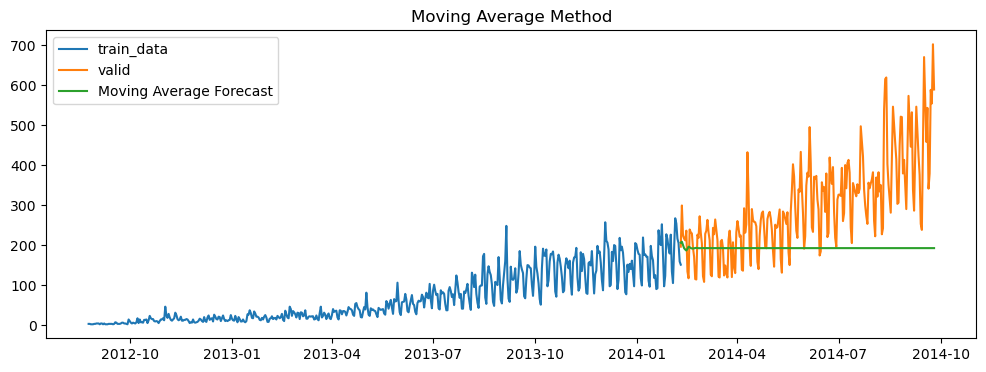

In [21]:
plt.figure(figsize=(12,4))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.plot(valid_data["Date"],valid_data['moving_average'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Method")
plt.show()

In [22]:
valid_data['moving_average'].head(25)

0     206.142857
1     208.306122
2     199.921283
3     192.195752
4     188.795145
5     186.480166
6     190.405904
7     196.035318
8     194.591384
9     192.632136
10    191.590829
11    191.504412
12    191.891450
13    192.664490
14    192.987146
15    192.551692
16    192.260308
17    192.207190
18    192.295241
19    192.408217
20    192.482040
21    192.455976
22    192.380095
23    192.355581
24    192.369191
Name: moving_average, dtype: float64

In [23]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['moving_average']))
print('The RMSE value for Moving Approach is', rmse)

The RMSE value for Moving Approach is 160.75797988387004


# Weighted Moving Average
Move the window and assign weights to the values in this window. I am taking higher weights to recent observations. Weights can be assigned manually or using a function.

In [29]:
# list holding last seven values and weights

week_values = train_data['count'][527:534].values
week_values = week_values.tolist()

weights = []
for i in range(1,8):
    W = i/7
    weights.append(W)

In [30]:
weights

[0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857143,
 0.8571428571428571,
 1.0]

In [31]:
len(week_values), len(weights)

(7, 7)

In [32]:
valid_data['weighted_moving_average'] = 0

In [33]:
week_values

[191, 267, 254, 216, 205, 159, 151]

In [34]:
for i in range(0,len(valid_data)):
    
    end = len(week_values)
    start = len(week_values)-7
    
    final_values = week_values[start:end]
    
    weighted_mean = 0
    for j, k in zip(weights,final_values):
        weighted_mean += j*k
        
    weighted_mean = weighted_mean/sum(weights)
        
    valid_data['weighted_moving_average'][i] = weighted_mean
    week_values.append(weighted_mean)

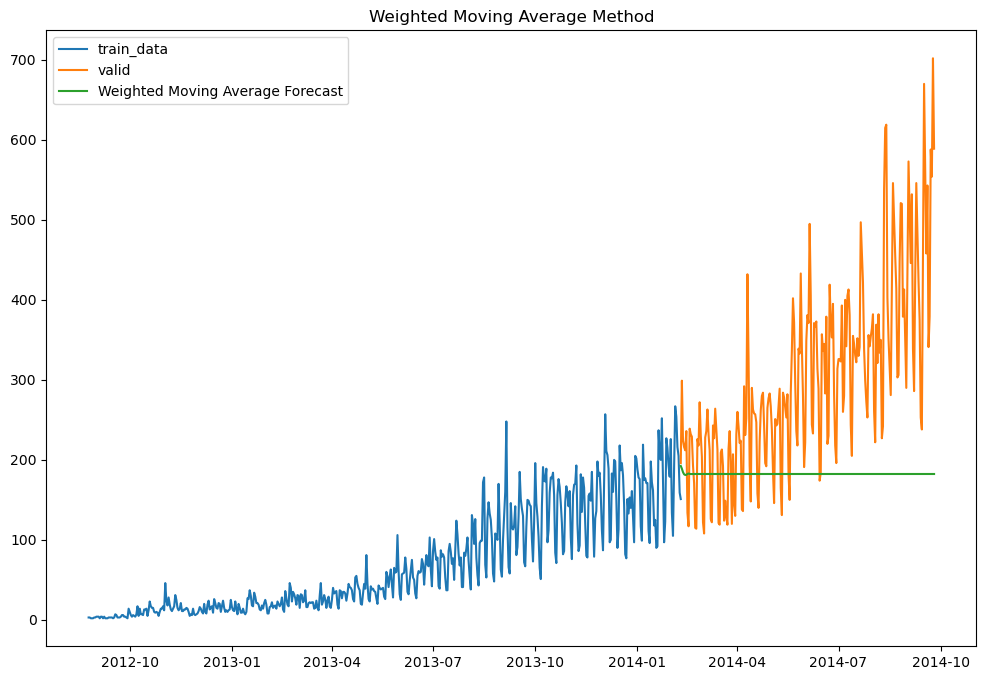

In [36]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.plot(valid_data["Date"],valid_data['weighted_moving_average'], label='Weighted Moving Average Forecast')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [37]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['weighted_moving_average']))
print('The RMSE value for Weighted Moving Approach is', rmse)

The RMSE value for Weighted Moving Approach is 167.7439710784862


In [38]:
valid_data

,Date,count,moving_average,weighted_moving_average
0,2014-02-09,196,206.142857,192.392857
1,2014-02-10,299,208.306122,188.955357
2,2014-02-11,224,199.921283,184.608737
3,2014-02-12,216,192.195752,181.962771
4,2014-02-13,212,188.795145,181.133573
...,...,...,...,...
224,2014-09-21,379,192.392857,182.357143
225,2014-09-22,588,192.392857,182.357143
226,2014-09-23,554,192.392857,182.357143
227,2014-09-24,702,192.392857,182.357143
